In [2]:
%pip install pydeseq2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [3]:
SEACell_ad = sc.read('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/ad_seacell_wlabels_GFP/ad_seacell_wlabels.h5ad')

In [4]:
SEACell_ad

AnnData object with n_obs × n_vars = 351 × 13893
    obs: 'Purity', 'Cell_type', 'Compactness', 'separation', 'sample', 'dpi', '229E', 'Id'
    layers: 'raw'

In [5]:
SEACell_ad.X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3906494 stored elements and shape (351, 13893)>

# DESeq 

In [6]:
SEACell_ad.obs

,Purity,Cell_type,Compactness,separation,sample,dpi,229E,Id
SEACell-3_Inf_J3_POS,0.673913,Goblet cells,0.000059,0.004392,Inf,J3,POS,Inf_J3
SEACell-41_Inf_J3_NEG,0.938053,Club cells,0.000102,0.006673,Inf,J3,NEG,Inf_J3
SEACell-45_Inf_J3_NEG,0.865385,Club cells,0.000106,0.002988,Inf,J3,NEG,Inf_J3
SEACell-56_Inf_J3_NEG,0.629310,Club cells,0.000107,0.006870,Inf,J3,NEG,Inf_J3
SEACell-23_Inf_J3_NEG,0.908333,Goblet cells,0.000115,0.005121,Inf,J3,NEG,Inf_J3
...,...,...,...,...,...,...,...,...
SEACell-26_Mock_J6_NEG,0.666667,Undetermined serous cells,0.000083,0.018397,Mock,J6,NEG,Mock_J6
SEACell-54_Mock_J6_NEG,0.868852,Superbasal,0.000029,0.003984,Mock,J6,NEG,Mock_J6
SEACell-70_Mock_J6_NEG,1.000000,Basal cells,0.017228,0.038523,Mock,J6,NEG,Mock_J6
SEACell-73_Mock_J6_NEG,1.000000,Basal cells,0.000748,0.038880,Mock,J6,NEG,Mock_J6


In [7]:
%pip install sanbomics

Note: you may need to restart the kernel to use updated packages.


In [8]:
from sanbomics.plots import volcano

In [9]:
SEACell_ad.obs['Cell_type'].unique()

['Goblet cells', 'Club cells', 'Ciliated cells', 'Superbasal', 'Unk3', ..., 'Undetermined serous cells', 'Unk2', 'Ionocytes', 'Deuterosomal', 'Unk1']
Length: 11
Categories (11, object): ['Basal cells', 'Ciliated cells', 'Club cells', 'Deuterosomal', ..., 'Undetermined serous cells', 'Unk1', 'Unk2', 'Unk3']

# All the graphes

In [10]:
cell_type = ['Superbasal', 'Club cells', 'Goblet cells', 'Ciliated cells','Undetermined serous cells', 'Basal cells']

C:\Users\test\AppData\Local\Temp\ipykernel_2676\913392727.py:10: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.02 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.93 seconds.

Fitting dispersion trend curve...
... done in 0.46 seconds.

Fitting MAP dispersions...
... done in 2.22 seconds.

Fitting LFCs...
... done in 1.63 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 78 outlier genes.

Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.03 seconds.

Running Wald tests...
... done in 1.02 seconds.



Log2 fold change & Wald test p-value: 229E POS vs NEG
          baseMean  log2FoldChange     lfcSE      stat        pvalue      padj
NOC2L    33.637937       -0.013160  0.473888 -0.027770  9.778454e-01  0.999677
KLHL17    2.530533       -0.271852  1.185766 -0.229262  8.186649e-01  0.999677
PLEKHN1  18.456286       -0.659554  0.709867 -0.929123  3.528254e-01  0.999677
PERM1     0.233620        2.873842  4.157122  0.691306  4.893735e-01  0.999677
HES4     49.594121       -0.104700  0.344256 -0.304134  7.610255e-01  0.999677
...            ...             ...       ...       ...           ...       ...
EGFP      0.890992        4.838418  1.664564  2.906719  3.652416e-03  0.999677
REPLI     6.140808        5.328449  1.314418  4.053847  5.038223e-05  0.228920
GLYCO     2.449898        4.358273  0.860257  5.066245  4.057392e-07  0.005531
MEMB      2.579665        2.586397  0.804536  3.214768  1.305502e-03  0.999677
NUCL      4.005093        4.176220  0.884883  4.719515  2.364071e-06  0.01611

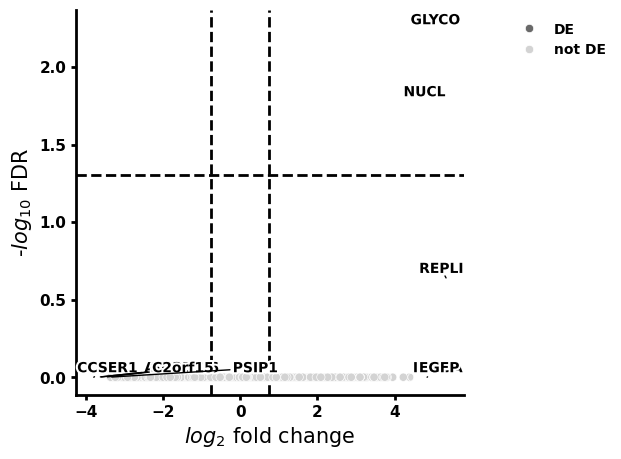

Volcano plot of the cell type: Superbasal and dpi: J3 between 229E positive and 229E negative


C:\Users\test\AppData\Local\Temp\ipykernel_2676\913392727.py:10: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.02 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.07 seconds.

Fitting dispersion trend curve...
... done in 0.45 seconds.

Fitting MAP dispersions...
... done in 2.48 seconds.

Fitting LFCs...
... done in 1.39 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 171 outlier genes.

Fitting dispersions...
... done in 0.11 seconds.

Fitting MAP dispersions...
... done in 0.09 seconds.

Fitting LFCs...
... done in 0.08 seconds.

Running Wald tests...
... done in 1.04 seconds.



Log2 fold change & Wald test p-value: 229E POS vs NEG
          baseMean  log2FoldChange     lfcSE      stat        pvalue  \
NOC2L    19.512946        0.320247  0.357188  0.896578  3.699442e-01   
KLHL17    2.830745        0.228303  0.839060  0.272094  7.855498e-01   
PLEKHN1  13.893547       -0.427247  0.846734 -0.504583  6.138520e-01   
PERM1     0.106271        1.458122  2.967182  0.491416  6.231320e-01   
HES4     28.746825       -0.461766  0.373761 -1.235458  2.166600e-01   
...            ...             ...       ...       ...           ...   
EGFP      2.468730        6.230074  1.317035  4.730377  2.241031e-06   
REPLI     4.859079        6.186497  0.914015  6.768487  1.301363e-11   
GLYCO     2.925088        6.153057  1.152971  5.336699  9.465389e-08   
MEMB      5.389492        5.864433  0.931134  6.298165  3.011906e-10   
NUCL      5.557887        5.865741  1.037939  5.651333  1.592081e-08   

                 padj  
NOC2L    9.999560e-01  
KLHL17   9.999560e-01  
PLEKHN1  

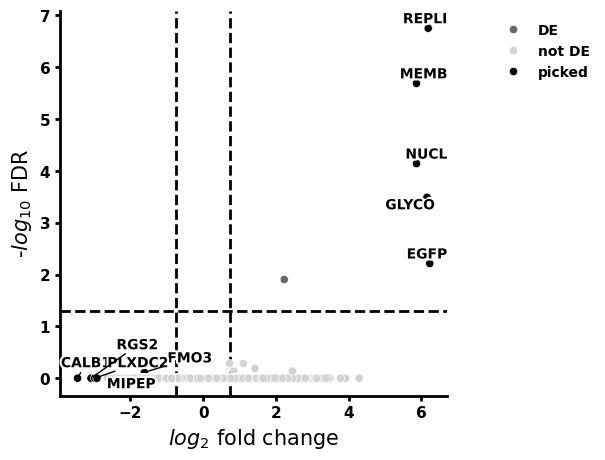

Volcano plot of the cell type: Superbasal and dpi: J6 between 229E positive and 229E negative


C:\Users\test\AppData\Local\Temp\ipykernel_2676\913392727.py:10: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.02 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.98 seconds.

Fitting dispersion trend curve...
... done in 0.43 seconds.

Fitting MAP dispersions...
... done in 2.26 seconds.

Fitting LFCs...
... done in 1.33 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 20 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...
... done in 1.01 seconds.



Log2 fold change & Wald test p-value: 229E POS vs NEG
          baseMean  log2FoldChange     lfcSE       stat        pvalue  \
NOC2L    21.295963        0.132240  0.262037   0.504663  6.137957e-01   
KLHL17    3.287571        0.380221  0.586857   0.647894  5.170535e-01   
PLEKHN1   5.868730        0.643039  0.449940   1.429167  1.529564e-01   
PERM1     0.570113       -0.712751  1.619813  -0.440020  6.599223e-01   
HES4     49.434505        0.220132  0.195809   1.124215  2.609220e-01   
...            ...             ...       ...        ...           ...   
EGFP      5.747419        6.643658  0.815231   8.149420  3.656744e-16   
REPLI     9.847889        5.883452  0.552947  10.640170  1.937746e-26   
GLYCO     8.169099        6.072803  0.557413  10.894616  1.222807e-27   
MEMB     15.290935        6.059082  0.430166  14.085467  4.665666e-45   
NUCL     18.360571        5.733295  0.451257  12.705178  5.534361e-37   

                 padj  
NOC2L    9.995890e-01  
KLHL17   9.995890e-01

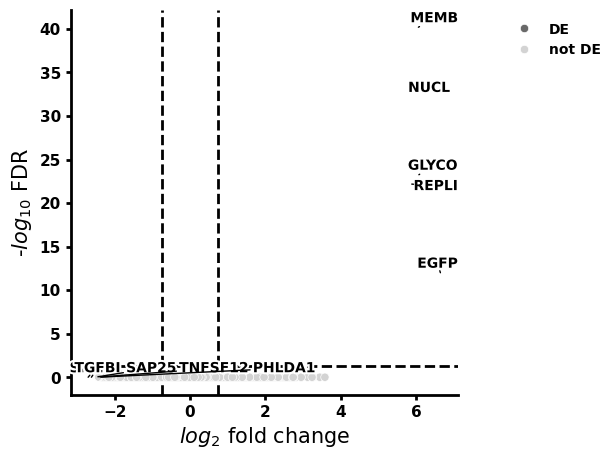

Volcano plot of the cell type: Club cells and dpi: J3 between 229E positive and 229E negative


C:\Users\test\AppData\Local\Temp\ipykernel_2676\913392727.py:10: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.30 seconds.

Fitting dispersion trend curve...
... done in 0.38 seconds.

Fitting MAP dispersions...
... done in 1.82 seconds.

Fitting LFCs...
... done in 1.33 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.05 seconds.



Log2 fold change & Wald test p-value: 229E POS vs NEG
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    14.271292        1.225390  0.731544  1.675073  0.093920  0.999837
KLHL17    2.350014        0.906546  1.796727  0.504554  0.613872  0.999837
PLEKHN1   4.000672        1.242434  1.377177  0.902160  0.366972  0.999837
PERM1     0.133009        1.904300  6.081150  0.313148  0.754168  0.999837
HES4     25.879491       -0.096829  0.724168 -0.133711  0.893631  0.999837
...            ...             ...       ...       ...       ...       ...
EGFP      0.790119        3.866427  2.574848  1.501613  0.133197  0.999837
REPLI     0.792980        3.865758  2.572418  1.502772  0.132898  0.999837
GLYCO     0.403186        0.906668  4.332329  0.209280  0.834230  0.999837
MEMB      1.138027        2.655485  2.270706  1.169454  0.242221  0.999837
NUCL      1.351697        4.865863  2.039487  2.385828  0.017041  0.999837

[13893 rows x 6 columns]
None


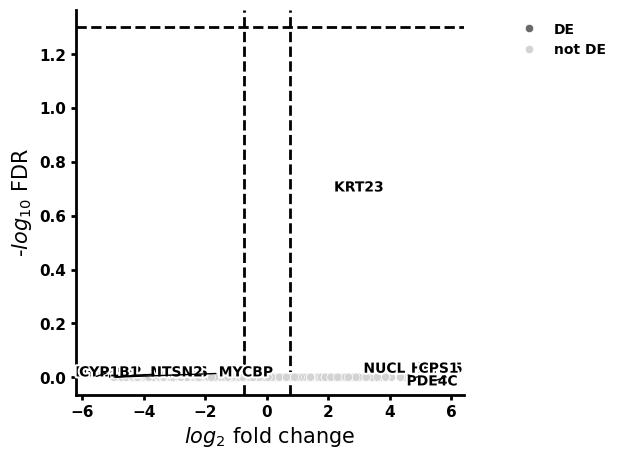

Volcano plot of the cell type: Club cells and dpi: J6 between 229E positive and 229E negative


C:\Users\test\AppData\Local\Temp\ipykernel_2676\913392727.py:10: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.02 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.93 seconds.

Fitting dispersion trend curve...
... done in 0.43 seconds.

Fitting MAP dispersions...
... done in 2.29 seconds.

Fitting LFCs...
... done in 1.63 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 28 outlier genes.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.02 seconds.

Running Wald tests...
... done in 1.05 seconds.



Log2 fold change & Wald test p-value: 229E POS vs NEG
          baseMean  log2FoldChange     lfcSE       stat        pvalue  \
NOC2L    19.884377        0.101175  0.220792   0.458237  6.467819e-01   
KLHL17    2.161912       -0.059889  0.637022  -0.094013  9.250985e-01   
PLEKHN1   5.840635        0.173996  0.421445   0.412856  6.797123e-01   
PERM1     0.118421        1.399011  2.618638   0.534251  5.931677e-01   
HES4     37.227722       -0.091168  0.234454  -0.388854  6.973842e-01   
...            ...             ...       ...        ...           ...   
EGFP      8.270539        6.641472  0.885904   7.496831  6.537898e-14   
REPLI    16.427668        6.290175  0.737595   8.527955  1.489569e-17   
GLYCO    29.943384        7.047366  0.761964   9.248950  2.267091e-20   
MEMB     50.838979        6.603109  0.646685  10.210707  1.775671e-24   
NUCL     70.845698        7.628913  0.829806   9.193606  3.798897e-20   

                 padj  
NOC2L    9.985909e-01  
KLHL17   9.985909e-01

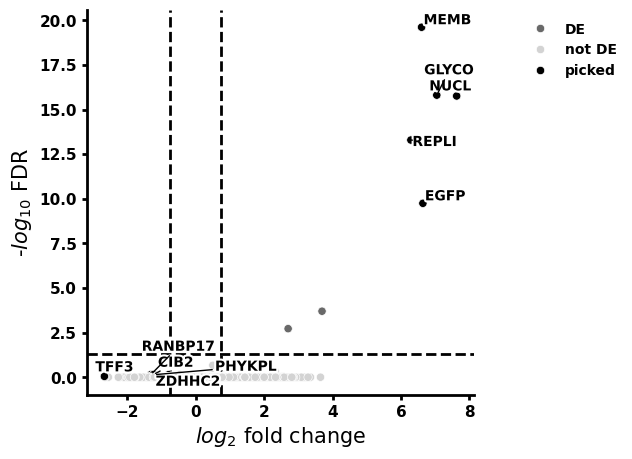

Volcano plot of the cell type: Goblet cells and dpi: J3 between 229E positive and 229E negative


C:\Users\test\AppData\Local\Temp\ipykernel_2676\913392727.py:10: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.03 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.04 seconds.

Fitting dispersion trend curve...
... done in 0.43 seconds.

Fitting MAP dispersions...
... done in 2.50 seconds.

Fitting LFCs...
... done in 1.45 seconds.

Calculating cook's distance...
... done in 0.05 seconds.

Replacing 11 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...
... done in 1.03 seconds.



Log2 fold change & Wald test p-value: 229E POS vs NEG
          baseMean  log2FoldChange     lfcSE      stat        pvalue  \
NOC2L    10.650303        0.156422  0.300665  0.520253  6.028875e-01   
KLHL17    1.430655       -0.542219  0.947913 -0.572013  5.673128e-01   
PLEKHN1   2.614700        0.860703  0.519905  1.655500  9.782304e-02   
PERM1     0.381723        1.618213  1.242170  1.302731  1.926668e-01   
HES4     17.982608       -0.377774  0.275577 -1.370845  1.704232e-01   
...            ...             ...       ...       ...           ...   
EGFP      2.752826        5.773445  1.116275  5.172061  2.315255e-07   
REPLI     6.333143        6.541921  0.930151  7.033183  2.018740e-12   
GLYCO     4.425046        6.477106  1.170249  5.534809  3.115683e-08   
MEMB      7.836326        6.412600  0.898350  7.138198  9.456216e-13   
NUCL      5.405574        5.849067  0.766077  7.635090  2.256635e-14   

                 padj  
NOC2L    9.552024e-01  
KLHL17   9.521945e-01  
PLEKHN1  

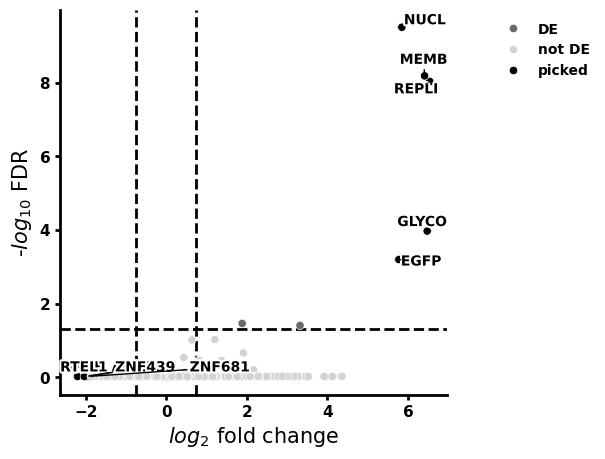

Volcano plot of the cell type: Goblet cells and dpi: J6 between 229E positive and 229E negative


C:\Users\test\AppData\Local\Temp\ipykernel_2676\913392727.py:10: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.70 seconds.

Fitting dispersion trend curve...
... done in 0.40 seconds.

Fitting MAP dispersions...
... done in 1.88 seconds.

Fitting LFCs...
... done in 1.49 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 2361 outlier genes.

Fitting dispersions...
... done in 0.35 seconds.

Fitting MAP dispersions...
... done in 0.42 seconds.

Fitting LFCs...
... done in 0.47 seconds.

Running Wald tests...
... done in 1.11 seconds.



Log2 fold change & Wald test p-value: 229E POS vs NEG
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    7.011901       -0.111551  1.046093 -0.106635  0.915078  0.999886
KLHL17   0.732174        0.206543  2.148946  0.096114  0.923430  0.999886
PLEKHN1  1.607045       -0.246888  1.857884 -0.132887  0.894283  0.999886
PERM1    0.221351       -0.244526  6.122531 -0.039939  0.968142  0.999886
HES4     1.964120        0.109897  1.397218  0.078654  0.937308  0.999886
...           ...             ...       ...       ...       ...       ...
EGFP     0.367261        4.514023  4.321035  1.044663  0.296179  0.999886
REPLI    0.503208        4.528418  2.974763  1.522279  0.127939  0.999886
GLYCO    0.833598        4.920502  2.031211  2.422448  0.015416  0.999886
MEMB     1.602458        5.486099  1.476091  3.716640  0.000202  0.999886
NUCL     2.094333        4.951513  1.474895  3.357197  0.000787  0.999886

[13893 rows x 6 columns]
None


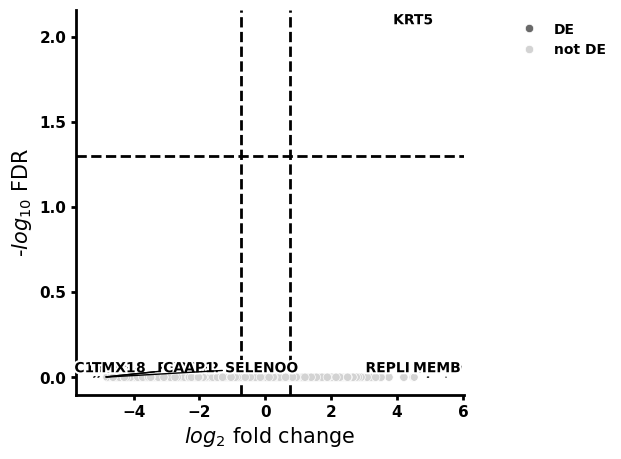

Volcano plot of the cell type: Ciliated cells and dpi: J3 between 229E positive and 229E negative


C:\Users\test\AppData\Local\Temp\ipykernel_2676\913392727.py:10: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.61 seconds.

Fitting dispersion trend curve...
... done in 0.39 seconds.

Fitting MAP dispersions...
... done in 1.86 seconds.

Fitting LFCs...
... done in 1.57 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 4185 outlier genes.

Fitting dispersions...
... done in 0.53 seconds.

Fitting MAP dispersions...
... done in 0.63 seconds.

Fitting LFCs...
... done in 0.59 seconds.

Running Wald tests...
... done in 1.03 seconds.



Log2 fold change & Wald test p-value: 229E POS vs NEG
         baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
NOC2L    4.550126       -1.129513  1.661087 -0.679985  0.496514  0.99996
KLHL17   0.467850       -0.338880  3.832059 -0.088433  0.929533  0.99996
PLEKHN1  0.593350       -0.500302  3.901247 -0.128241  0.897958  0.99996
PERM1    0.035157        1.065044  5.959137  0.178725  0.858154  0.99996
HES4     1.556646        1.914522  1.534903  1.247324  0.212279  0.99996
...           ...             ...       ...       ...       ...      ...
EGFP     0.000000             NaN       NaN       NaN       NaN      NaN
REPLI    0.164087        0.673760  5.938916  0.113448  0.909675  0.99996
GLYCO    0.000000             NaN       NaN       NaN       NaN      NaN
MEMB     0.000000             NaN       NaN       NaN       NaN      NaN
NUCL     0.061586        1.028349  5.957022  0.172628  0.862944  0.99996

[13893 rows x 6 columns]
None


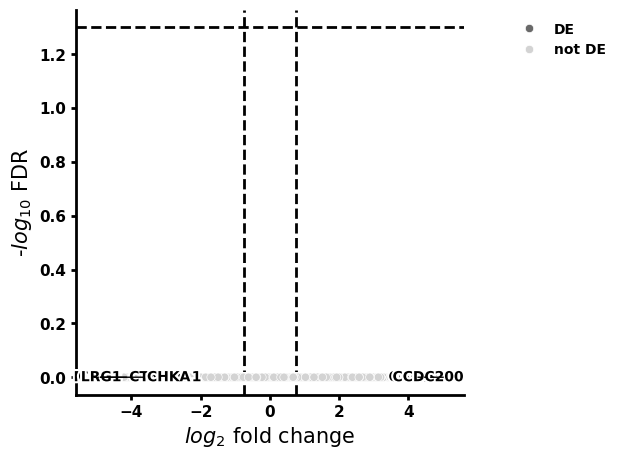

Volcano plot of the cell type: Ciliated cells and dpi: J6 between 229E positive and 229E negative


C:\Users\test\AppData\Local\Temp\ipykernel_2676\913392727.py:10: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.40 seconds.

Fitting dispersion trend curve...
... done in 0.39 seconds.

Fitting MAP dispersions...
... done in 1.80 seconds.

Fitting LFCs...
... done in 1.48 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.03 seconds.



Log2 fold change & Wald test p-value: 229E POS vs NEG
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    10.008445        0.030412  1.037348  0.029317  0.976611  0.999748
KLHL17    1.552878       -1.746014  3.660912 -0.476934  0.633409  0.999748
PLEKHN1   7.591378       -1.207782  1.651409 -0.731365  0.464556  0.999748
PERM1     0.000000             NaN       NaN       NaN       NaN       NaN
HES4     14.811497       -1.203203  1.259482 -0.955315  0.339418  0.999748
...            ...             ...       ...       ...       ...       ...
EGFP      1.708291        6.188975  2.425071  2.552080  0.010708  0.999748
REPLI     2.847152        6.925945  2.062278  3.358395  0.000784  0.999748
GLYCO     3.416582        7.188980  1.964595  3.659269  0.000253  0.999748
MEMB      1.787389        5.611900  2.147831  2.612823  0.008980  0.999748
NUCL      2.633438        4.664227  1.595216  2.923883  0.003457  0.999748

[13893 rows x 6 columns]
None


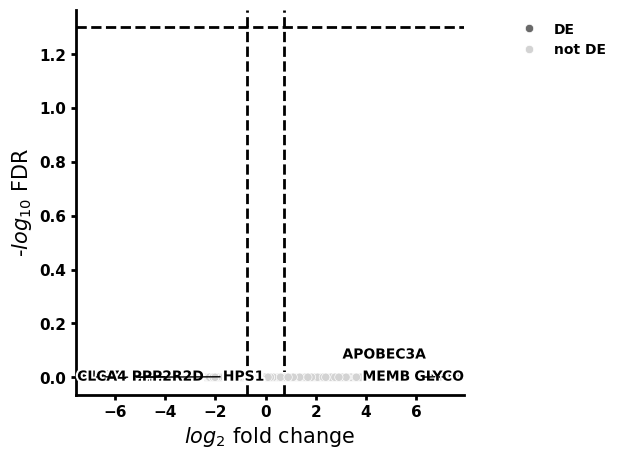

Volcano plot of the cell type: Undetermined serous cells and dpi: J6 between 229E positive and 229E negative


C:\Users\test\AppData\Local\Temp\ipykernel_2676\913392727.py:10: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.66 seconds.

Fitting dispersion trend curve...
... done in 0.48 seconds.

Fitting MAP dispersions...
... done in 2.04 seconds.

Fitting LFCs...
... done in 1.38 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 2342 outlier genes.

Fitting dispersions...
... done in 0.33 seconds.

Fitting MAP dispersions...
... done in 0.38 seconds.

Fitting LFCs...
... done in 0.56 seconds.

Running Wald tests...
... done in 1.03 seconds.



Log2 fold change & Wald test p-value: 229E POS vs NEG
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    10.025031       -1.264942  0.792453 -1.596235  0.110436  0.997274
KLHL17    0.822640        1.265396  2.351578  0.538105  0.590505  0.997274
PLEKHN1   3.190395        0.517001  1.277909  0.404568  0.685795  0.997274
PERM1     0.000000             NaN       NaN       NaN       NaN       NaN
HES4      3.088038       -1.953621  2.090568 -0.934493  0.350050  0.997274
...            ...             ...       ...       ...       ...       ...
EGFP      0.037991       -0.391787  6.121151 -0.064005  0.948966  0.997274
REPLI     0.000000             NaN       NaN       NaN       NaN       NaN
GLYCO     0.428039        3.318651  2.916051  1.138063  0.255094  0.997274
MEMB      0.387020        1.165306  2.485276  0.468884  0.639153  0.997274
NUCL      0.510555        2.432783  2.462019  0.988125  0.323091  0.997274

[13893 rows x 6 columns]
None


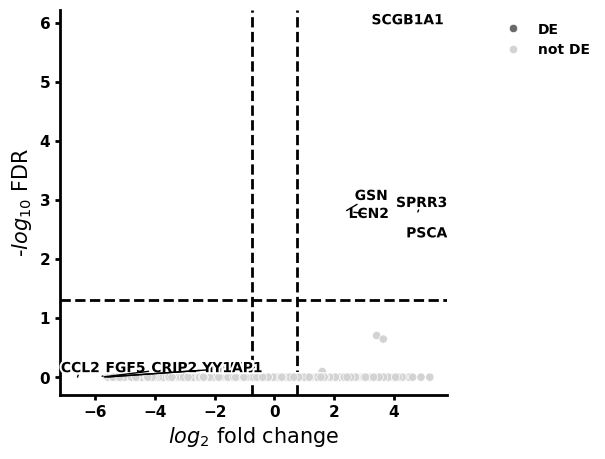

Volcano plot of the cell type: Basal cells and dpi: J3 between 229E positive and 229E negative


In [16]:
for _ in cell_type:
    for i in SEACell_ad.obs['dpi'].unique():
        mask = (SEACell_ad.obs['Cell_type'] == _) & (SEACell_ad.obs['229E'] == 'POS') & (SEACell_ad.obs['sample'] == 'Inf')& (SEACell_ad.obs['dpi'] == i)
        count = sum(mask)
        if count == 0:
            continue
        SEACell_ad_subset = SEACell_ad[(SEACell_ad.obs['Cell_type'] == _) & (SEACell_ad.obs['dpi'] == i) & (SEACell_ad.obs['sample'] == 'Inf')]
        
        counts = pd.DataFrame(SEACell_ad_subset.X.toarray(), columns = SEACell_ad_subset.var_names)
        dds = DeseqDataSet(
            counts = counts,
            metadata=SEACell_ad_subset.obs,
            design_factors="229E")
        dds.deseq2()
        stat_res = DeseqStats(dds, contrast=('229E', 'POS', 'NEG'))
        print(stat_res.summary())
        diff_expr  = stat_res.results_df
        diff_expr['symbol'] = SEACell_ad.var_names
        volcano(diff_expr)
        print(f'Volcano plot of the cell type: {_} and dpi: {i} between 229E positive and 229E negative')



In [ ]:
#base for customized volcano plot based on what is necessary

plt.figure(figsize = (6,6))

ax = sns.scatterplot(data = df, x = 'log2FoldChange', y = 'nlog10',
                    hue = 'color', hue_order = ['nobody_cares', 'picked1', 'picked2', 'i_care'],
                    palette = ['lightgrey', 'orange', 'purple', 'grey'],
                    style = 'shape', style_order = ['picked3', 'picked4', 'not_important'],
                    markers = ['^', 's', 'o'], 
                    size = 'baseMean', sizes = (40, 400))

ax.axhline(2, zorder = 0, c = 'k', lw = 2, ls = '--')
ax.axvline(1, zorder = 0, c = 'k', lw = 2, ls = '--')
ax.axvline(-1, zorder = 0, c = 'k', lw = 2, ls = '--')



texts = []
for i in range(len(df)):
    if df.iloc[i].nlog10 > 5 and abs(df.iloc[i].log2FoldChange) > 2:
        texts.append(plt.text(x = df.iloc[i].log2FoldChange, y = df.iloc[i].nlog10, s = df.iloc[i].symbol,
                             fontsize = 12, weight = 'bold'))
        
adjust_text(texts, arrowprops = dict(arrowstyle = '-', color = 'k'))





plt.legend(loc = 1, bbox_to_anchor = (1.4,1), frameon = False, prop = {'weight':'bold'})

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(width = 2)

plt.xticks(size = 12, weight = 'bold')
plt.yticks(size = 12, weight = 'bold')

plt.xlabel("$log_{2}$ fold change", size = 15)
plt.ylabel("-$log_{10}$ FDR", size = 15)

plt.savefig('volcano.png', dpi = 300, bbox_inches = 'tight', facecolor = 'white')

plt.show()

In [33]:
de.sort_values('stat', ascending = False)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
IFI6,188.569148,5.245403,0.444047,11.812708,3.355775e-32,3.649741e-28
IFIT1,23.809372,4.142389,0.380142,10.896954,1.191809e-27,6.481056e-24
ISG15,32.358044,4.269856,0.399155,10.697242,1.048529e-26,3.023770e-23
MX1,34.807227,2.798320,0.261726,10.691786,1.112089e-26,3.023770e-23
IFI27,146.122742,4.017119,0.379456,10.586522,3.441418e-26,7.485773e-23
...,...,...,...,...,...,...
TMSB15B-1,0.000000,NaN,NaN,NaN,NaN,NaN
TRPC5OS,0.000000,NaN,NaN,NaN,NaN,NaN
GABRQ,0.000000,NaN,NaN,NaN,NaN,NaN
PNMA6A,0.000000,NaN,NaN,NaN,NaN,NaN


In [34]:
res = de[de.baseMean >= 10]

In [35]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ISG15,32.358044,4.269856,0.399155,10.697242,1.048529e-26,3.023770e-23
AGRN,20.234148,0.875150,0.279563,3.130416,1.745588e-03,1.385768e-01
TTLL10,36.662745,-0.040801,0.242606,-0.168180,8.664419e-01,9.984997e-01
SDF4,18.245519,-0.114702,0.182627,-0.628064,5.299623e-01,9.984997e-01
INTS11,16.406733,0.086393,0.176654,0.489053,6.248041e-01,9.984997e-01
...,...,...,...,...,...,...
MT-ND3,37.217846,-0.257732,0.288221,-0.894217,3.712059e-01,9.984997e-01
MT-ND4L,15.255727,-0.483900,0.293372,-1.649438,9.905786e-02,9.313474e-01
MT-ND4,24.778676,-0.208107,0.265649,-0.783392,4.333970e-01,9.984997e-01
MT-ND5,15.257061,-0.395507,0.265710,-1.488492,1.366213e-01,9.775610e-01


In [40]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]

In [41]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ISG15,32.358044,4.269856,0.399155,10.697242,1.048529e-26,3.023770e-23
IFI6,188.569148,5.245403,0.444047,11.812708,3.355775e-32,3.649741e-28
IFI44L,12.322661,6.858129,0.759314,9.032009,1.685480e-19,1.309377e-16
IFI44,17.488103,3.044024,0.336602,9.043405,1.518665e-19,1.270539e-16
GBP1,21.341797,1.551748,0.324277,4.785261,1.707651e-06,3.439336e-04
ADAR,36.208119,1.058352,0.160092,6.610898,3.819967e-11,1.154054e-08
IFI16,21.300754,0.864637,0.171916,5.029423,4.919568e-07,1.070104e-04
EIF2AK2,19.030353,1.308187,0.201871,6.480298,9.154149e-11,2.620014e-08
CFAP221,43.727204,-0.504553,0.125994,-4.004572,6.212977e-05,9.009646e-03
STAT1,23.410700,2.132155,0.259710,8.209762,2.216280e-16,1.268645e-13


In [36]:
dds

AnnData object with n_obs × n_vars = 42 × 13893
    obs: 'Purity', 'Cell_type', 'Compactness', 'separation', 'sample', 'dpi', 'Id'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Id_colors'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable', 'X_pca'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'

In [37]:
dds.layers['normed_counts']

array([[ 0.        ,  1.65957383,  3.31914767, ...,  0.        ,
         0.        ,  0.        ],
       [ 9.10265976,  1.65502905,  0.82751452, ...,  0.41375726,
         0.        ,  0.        ],
       [11.44652374,  0.        ,  2.86163094, ...,  2.86163094,
         2.86163094,  8.58489281],
       ...,
       [ 5.91906641,  1.3659384 ,  1.3659384 , ...,  0.        ,
         0.        ,  0.4553128 ],
       [ 6.12888052,  0.34049336,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.35226654,  1.34090662,  8.0454397 , ...,  0.        ,
         0.        ,  0.        ]])

In [38]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'].copy())

In [39]:
dds.layers['log1p']

array([[0.        , 0.9781659 , 1.46305808, ..., 0.        , 0.        ,
        0.        ],
       [2.31279873, 0.9764556 , 0.60295686, ..., 0.34625089, 0.        ,
        0.        ],
       [2.52144137, 0.        , 1.35108962, ..., 1.35108962, 1.35108962,
        2.26018819],
       ...,
       [1.93428085, 0.86117473, 0.86117473, ..., 0.        , 0.        ,
        0.37522086],
       [1.96415421, 0.29303773, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.47069675, 0.8505383 , 2.20226073, ..., 0.        , 0.        ,
        0.        ]])

In [42]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 42 × 57
    obs: 'Purity', 'Cell_type', 'Compactness', 'separation', 'sample', 'dpi', 'Id'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Id_colors'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable', 'X_pca'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks', 'log1p'

In [43]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

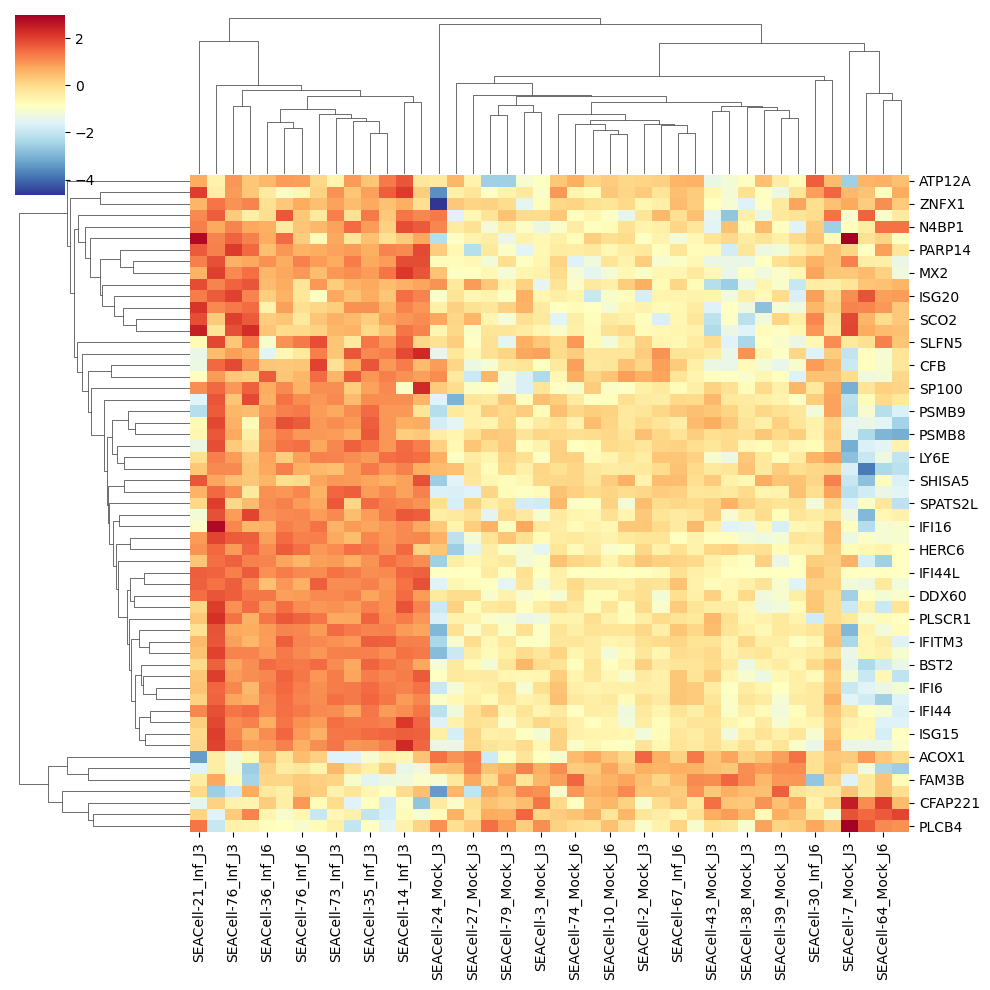

In [44]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')